<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/Notebooks/IT24102772_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Brain-Tumor-Detection' already exists and is not an empty directory.
Training data shape: (5712, 224, 224, 3)
Testing data shape: (1311, 224, 224, 3)
Pixel value range: min = 0.0 , max = 1.0


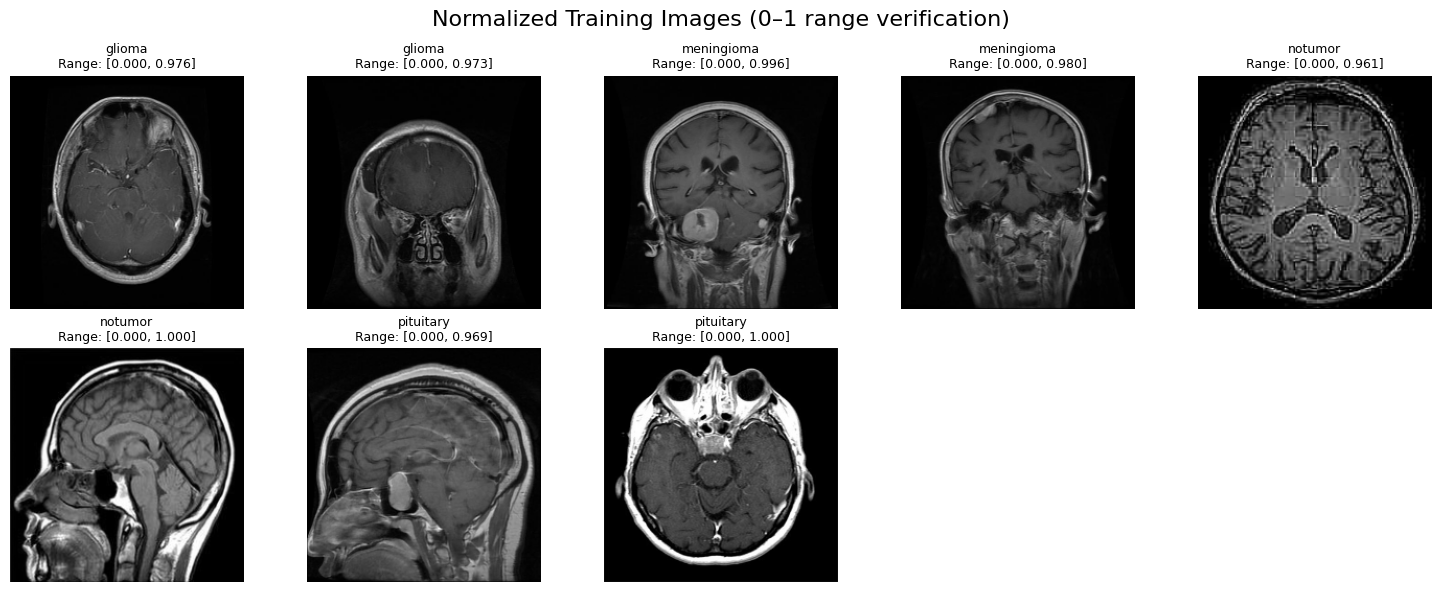

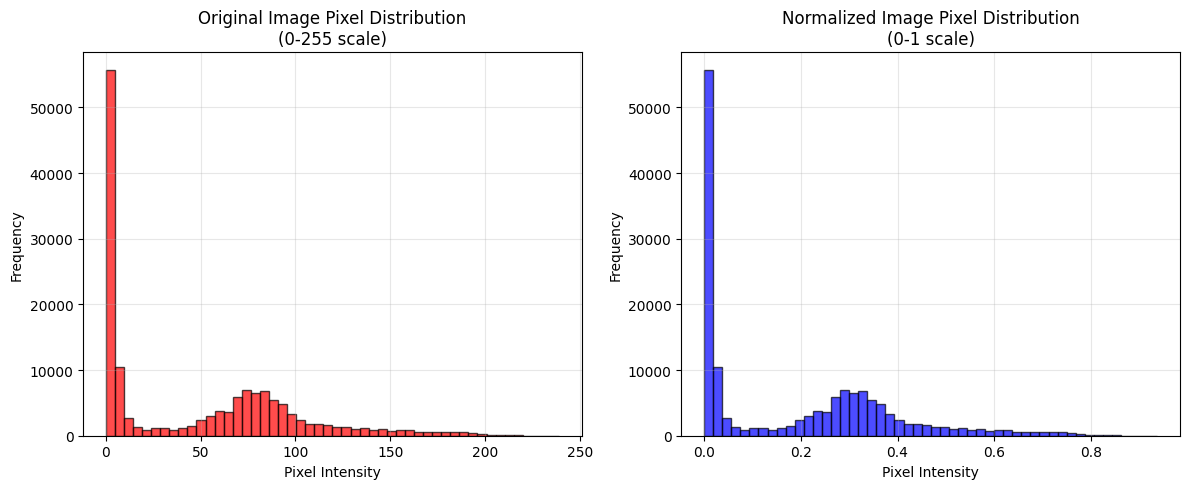

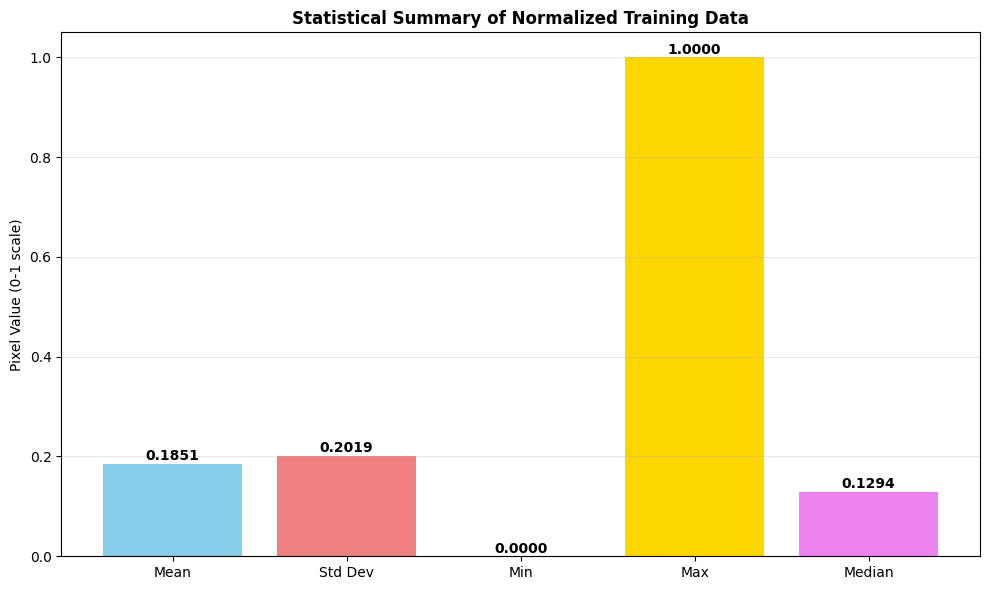


📊 NORMALIZATION STATISTICS:
Dataset shape: (5712, 224, 224, 3)
Total pixels analyzed: 859,815,936
Pixel value range: [0.000000, 1.000000]
Mean pixel intensity: 0.185128
Standard deviation: 0.201944
Median pixel intensity: 0.129412


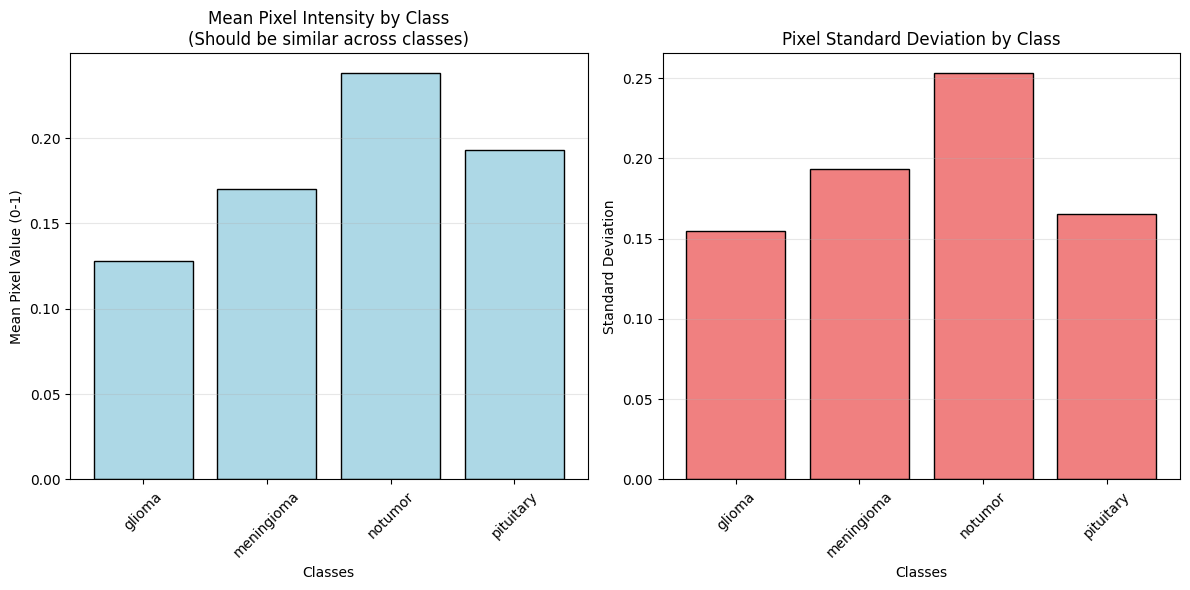


✅ NORMALIZATION VERIFICATION BY CLASS:
glioma          | Mean: 0.1280 | Std: 0.1550
meningioma      | Mean: 0.1703 | Std: 0.1933
notumor         | Mean: 0.2378 | Std: 0.2529
pituitary       | Mean: 0.1928 | Std: 0.1657


In [ ]:
# Install required libraries
!pip install opencv-python scikit-image seaborn

# Clone the GitHub repository
!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from collections import Counter

# --------------------------
# Step 1: Dataset Path
# --------------------------
train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"

IMG_SIZE = (224, 224)

# --------------------------
# Step 2: Function to Load & Normalize Images
# --------------------------
def load_and_normalize_images(directory):
    images = []
    labels = []

    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for img_name in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_name)

                try:
                    # Load image
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, IMG_SIZE)   # Resize to (224x224)

                    # Normalization: scale 0–255 → 0–1
                    img = img.astype("float32") / 255.0

                    images.append(img)
                    labels.append(class_name)
                except:
                    print("Corrupted image skipped:", img_path)

    return np.array(images), np.array(labels)

# --------------------------
# Step 3: Apply to Training & Test Data
# --------------------------
X_train, y_train = load_and_normalize_images(train_dir)
X_test, y_test = load_and_normalize_images(test_dir)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Pixel value range: min =", X_train.min(), ", max =", X_train.max())

# --------------------------
# Step 4: Essential Visualizations for Scaling & Normalization
# --------------------------

# Visualization 1: Sample Normalized Images with Pixel Value Verification
class_names = np.unique(y_train)
images_per_class = 2

selected_images = []
selected_labels = []

for class_name in class_names:
    class_indices = np.where(y_train == class_name)[0]
    selected_indices = np.random.choice(class_indices, size=min(images_per_class, len(class_indices)), replace=False)
    selected_images.extend(X_train[selected_indices])
    selected_labels.extend(y_train[selected_indices])

selected_images = np.array(selected_images)
selected_labels = np.array(selected_labels)

plt.figure(figsize=(15, 6))
for i in range(len(selected_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i])
    # Display actual pixel range in title
    pixel_min = selected_images[i].min()
    pixel_max = selected_images[i].max()
    plt.title(f"{selected_labels[i]}\nRange: [{pixel_min:.3f}, {pixel_max:.3f}]", fontsize=9)
    plt.axis("off")

plt.suptitle("Normalized Training Images (0–1 range verification)", fontsize=16)
plt.tight_layout()
plt.show()

# Visualization 2: Pixel Value Distribution Before and After Normalization
plt.figure(figsize=(12, 5))

# Load one original image to compare
sample_original_path = os.path.join(train_dir, class_names[0], os.listdir(os.path.join(train_dir, class_names[0]))[0])
original_img = cv2.imread(sample_original_path)
original_img = cv2.resize(original_img, IMG_SIZE)
normalized_img = original_img.astype("float32") / 255.0

# Subplot 1: Original pixel distribution (0-255)
plt.subplot(1, 2, 1)
plt.hist(original_img.flatten(), bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Original Image Pixel Distribution\n(0-255 scale)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subplot 2: Normalized pixel distribution (0-1)
plt.subplot(1, 2, 2)
plt.hist(normalized_img.flatten(), bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Normalized Image Pixel Distribution\n(0-1 scale)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Visualization 3: Statistical Summary of Normalized Dataset
plt.figure(figsize=(10, 6))

# Calculate statistics for all normalized images
all_pixels = X_train.flatten()
statistics = {
    'Mean': np.mean(all_pixels),
    'Std Dev': np.std(all_pixels),
    'Min': np.min(all_pixels),
    'Max': np.max(all_pixels),
    'Median': np.median(all_pixels)
}

# Create bar plot for key statistics
metrics = list(statistics.keys())
values = list(statistics.values())

bars = plt.bar(metrics, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
plt.title('Statistical Summary of Normalized Training Data', fontweight='bold')
plt.ylabel('Pixel Value (0-1 scale)')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed normalization statistics
print("\n📊 NORMALIZATION STATISTICS:")
print("="*50)
print(f"Dataset shape: {X_train.shape}")
print(f"Total pixels analyzed: {len(all_pixels):,}")
print(f"Pixel value range: [{all_pixels.min():.6f}, {all_pixels.max():.6f}]")
print(f"Mean pixel intensity: {all_pixels.mean():.6f}")
print(f"Standard deviation: {all_pixels.std():.6f}")
print(f"Median pixel intensity: {np.median(all_pixels):.6f}")

# Visualization 4: Verify Consistent Normalization Across Classes
plt.figure(figsize=(12, 6))

class_means = []
class_stds = []

for class_name in class_names:
    class_indices = np.where(y_train == class_name)[0]
    class_pixels = X_train[class_indices].flatten()
    class_means.append(np.mean(class_pixels))
    class_stds.append(np.std(class_pixels))

x_pos = np.arange(len(class_names))

plt.subplot(1, 2, 1)
plt.bar(x_pos, class_means, color='lightblue', edgecolor='black')
plt.title('Mean Pixel Intensity by Class\n(Should be similar across classes)')
plt.xlabel('Classes')
plt.ylabel('Mean Pixel Value (0-1)')
plt.xticks(x_pos, class_names, rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(x_pos, class_stds, color='lightcoral', edgecolor='black')
plt.title('Pixel Standard Deviation by Class')
plt.xlabel('Classes')
plt.ylabel('Standard Deviation')
plt.xticks(x_pos, class_names, rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ NORMALIZATION VERIFICATION BY CLASS:")
print("="*45)
for class_name, mean_val, std_val in zip(class_names, class_means, class_stds):
    print(f"{class_name:15} | Mean: {mean_val:.4f} | Std: {std_val:.4f}")

# --------------------------
# Step 5: Save Normalized Data
# --------------------------
np.save("X_train_normalized.npy", X_train)
np.save("y_train_labels.npy", y_train)
np.save("X_test_normalized.npy", X_test)
np.save("y_test_labels.npy", y_test)

print("\n✅ Normalized dataset saved as .npy files")